In [1]:
from matplotlib import pyplot as plt
from ptypy import io
import os
import numpy as np
from scipy import ndimage as ndi

In [4]:
data_path = "/home/iat69393/projects/i14-nearfield/pierre_analysis/i14_50738_prep_data_bin1.h5"

In [5]:
# Load data
data = io.h5read(data_path)

In [6]:
# Mortor coordinates
pos = data["positions"]

In [8]:
# Raw data
d = data["data"]

In [10]:
energy_keV = 12

In [11]:
# Work on downsampled data
d1 = ndi.zoom(d, zoom=(1, .25, .25))

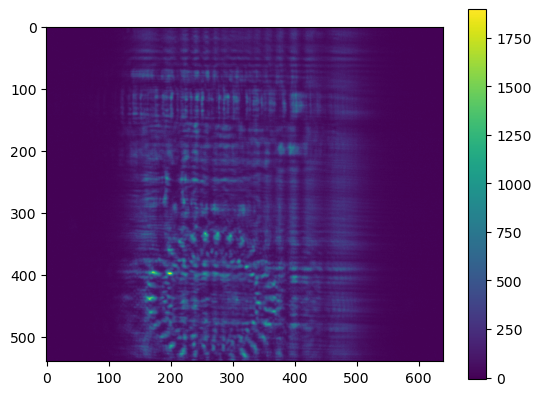

In [18]:
plt.imshow(d1[0])
plt.colorbar()

In [26]:
# Take care of negative values
d1[d1<0] = 0.

In [27]:
# No empty beam frame. Use median among frames
d0 = np.median(d1, axis=0)

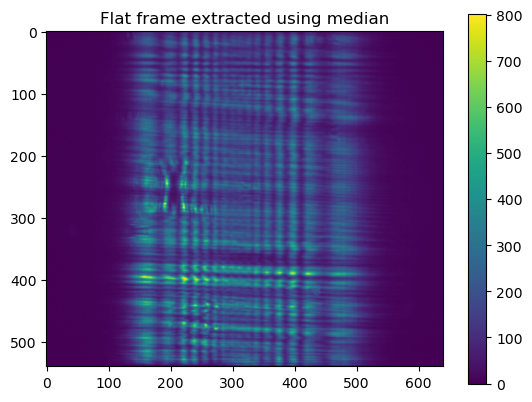

In [30]:
plt.imshow(d0)
ax = plt.gca()
ax.set_title('Flat frame extracted using median')
plt.colorbar()

In [31]:
mask = (d0>.1*d0.max())

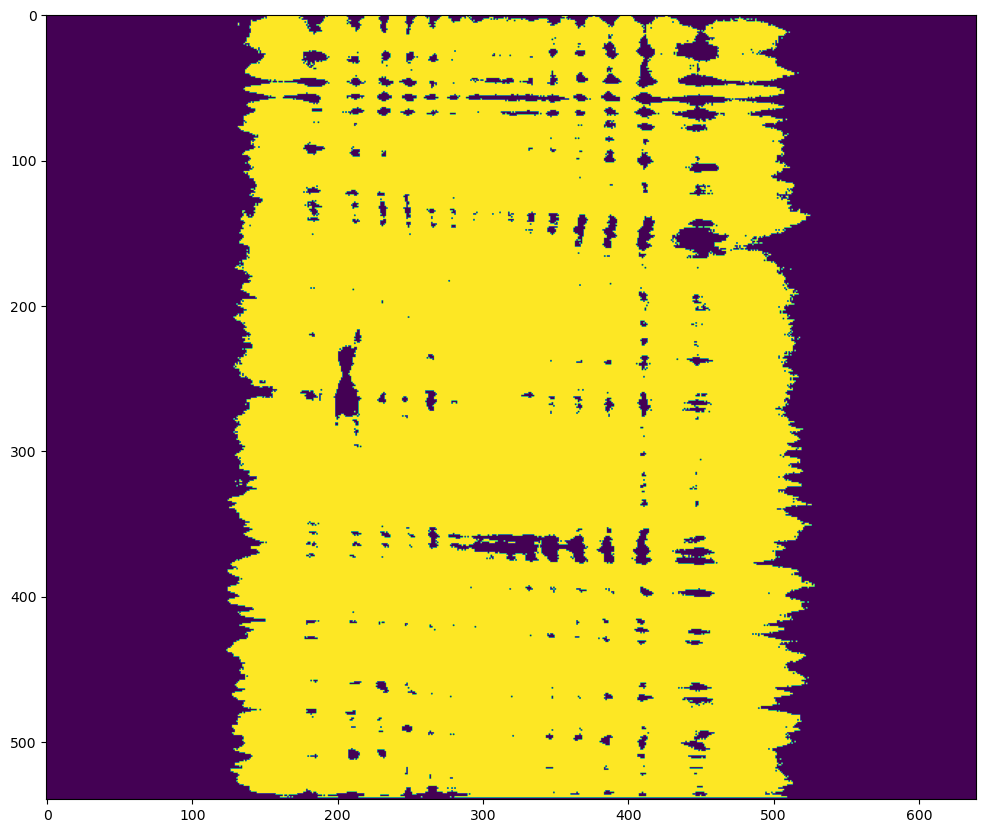

In [32]:
plt.figure(figsize=(12,12))
plt.imshow(mask)

In [40]:
xp = -pos[1]
yp = -pos[0]

In [42]:
px = xp * 100 / .005
py = -yp*200/ .01

In [43]:
%run stitching.py

In [44]:
img, flat, positions = merge_image_stack(frames=d1, positions=-np.array([py, px], dtype=int).T, flat=d0, mask=mask, refine_flat=False, max_iter=5, max_shift=20)

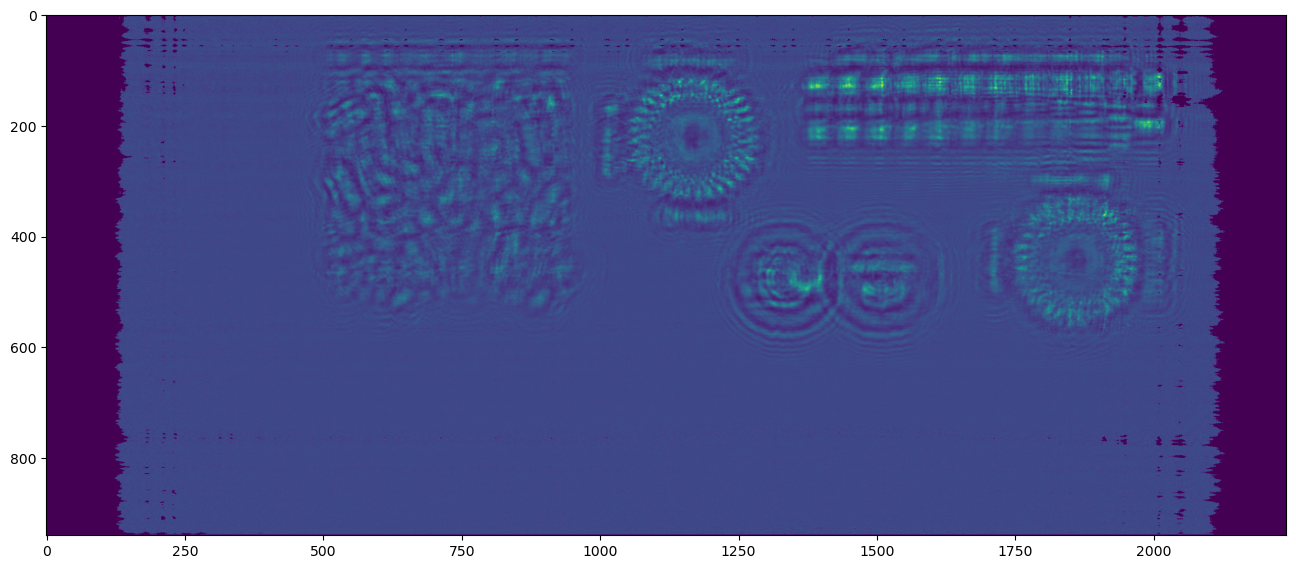

In [45]:
plt.figure(figsize=(16,8))
plt.imshow(img)

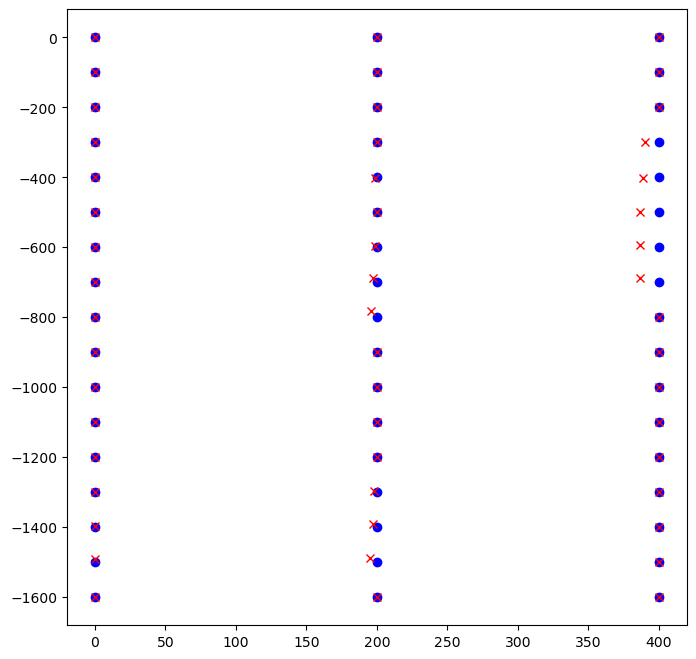

In [48]:
plt.figure(figsize=(8,8))
plt.plot(-py, -px, 'bo')
plt.plot(positions[:,0], positions[:,1], 'rx')